In [31]:
import matplotlib.pyplot as plt
import cv2
imagePath = "D:\\Casper\\OTHER\\Data\\dpaml_hw3\\jpg_dataset\\casper_photo\\IMG_1123.jpg"
imagePath = "D:\\Casper\\OTHER\\Data\\dpaml_hw3\\jpg_dataset\\tzu_photo\\IMG_3285.JPG"

In [32]:
img = cv2.imread(imagePath)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(50, 50)
)
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 959.5, 1704.5, -0.5)

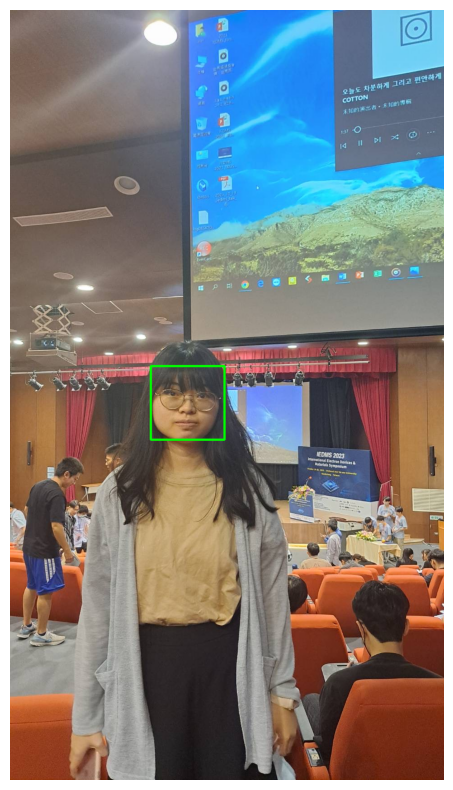

In [33]:
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

In [41]:
import cv2
import os

def process_images(input_folder, output_folder):
    """
    Processes images by detecting the largest face, cropping a 150% larger area, and saving the modified image.
    
    Parameters:
    - input_folder (str): The folder containing the images to process.
    - output_folder (str): The folder where the cropped images will be saved.
    """
    # Ensure output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Load the face classifier
    face_classifier = cv2.CascadeClassifier(
        cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
    )

    # Process each image in the input folder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.PNG', '.JPG')):
            # Read the image
            img_path = os.path.join(input_folder, filename)
            img = cv2.imread(img_path)
            print(img_path)
            gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # Detect faces
            faces = face_classifier.detectMultiScale(
                gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(50, 50)
            )
            
            if len(faces) == 0:
                continue  # Skip images with no faces

            # Find the largest face
            largest_face = max(faces, key=lambda b: b[2] * b[3])
            x, y, w, h = largest_face

            # Calculate the new bounding box dimensions
            center_x, center_y = x + w // 2, y + h // 2
            new_width = int(2 * w)
            new_height = int(2 * h)
            new_x = max(0, center_x - new_width // 2)
            new_y = max(0, center_y - new_height // 2)

            # Crop the image
            cropped_img = img[new_y:new_y + new_height, new_x:new_x + new_width]

            # Save the cropped image
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, cropped_img)

# Example usage
input_folder = 'D:\\Casper\\OTHER\\Data\\dpaml_hw3\\jpg_dataset\\professor_photo'
# input_folder = 'D:\\Casper\\OTHER\\Data\\dpaml_hw3\\test_data'
output_folder = 'D:\\Casper\\OTHER\\Data\\dpaml_hw3\\face_data\\professor_photo'
process_images(input_folder, output_folder)


D:\Casper\OTHER\Data\dpaml_hw3\jpg_dataset\professor_photo\LINE_ALBUM_🙇🏻‍♂️_240402_1.jpg


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [1]:
import os
from PIL import Image

def delete_small_photos(directory, min_resolution=150):
    """
    Deletes images in the specified directory if their resolution is smaller than the minimum resolution.

    Parameters:
    - directory (str): Path to the directory containing images.
    - min_resolution (int): The minimum resolution (either width or height) allowed for the images.
    """
    # Count of deleted files
    deleted_files_count = 0

    # Loop through all files in the directory
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):  # Add any other image formats as needed
            file_path = os.path.join(directory, filename)
            
            try:
                with Image.open(file_path) as img:
                    width, height = img.size  # Get image dimensions

                    # Check if either dimension is below the minimum resolution
                    if width < min_resolution or height < min_resolution:
                        os.remove(file_path)  # Delete the image
                        deleted_files_count += 1
                        print(f"Deleted {filename} due to insufficient resolution ({width}x{height}).")

            except Exception as e:
                print(f"Failed to process {filename}. Error: {e}")

    print(f"Total deleted files: {deleted_files_count}")

# Example usage
directory_path = 'D:\\Casper\\OTHER\\Data\\dpaml_hw3\\face_data\\Jean_photo'
delete_small_photos(directory_path)


Failed to process 08B0CBDB-B06E-4C82-9AD8-04AE35E4A444.jpg. Error: [WinError 32] 程序無法存取檔案，因為檔案正由另一個程序使用。: 'D:\\Casper\\OTHER\\Data\\dpaml_hw3\\face_data\\Jean_photo\\08B0CBDB-B06E-4C82-9AD8-04AE35E4A444.jpg'
Failed to process IMG_7075.JPG. Error: [WinError 32] 程序無法存取檔案，因為檔案正由另一個程序使用。: 'D:\\Casper\\OTHER\\Data\\dpaml_hw3\\face_data\\Jean_photo\\IMG_7075.JPG'
Failed to process IMG_9153.JPG. Error: [WinError 32] 程序無法存取檔案，因為檔案正由另一個程序使用。: 'D:\\Casper\\OTHER\\Data\\dpaml_hw3\\face_data\\Jean_photo\\IMG_9153.JPG'
Failed to process IMG_9182.JPG. Error: [WinError 32] 程序無法存取檔案，因為檔案正由另一個程序使用。: 'D:\\Casper\\OTHER\\Data\\dpaml_hw3\\face_data\\Jean_photo\\IMG_9182.JPG'
Total deleted files: 0


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Standardizing and applying PCA
# Using a pipeline to chain PCA and SVM
pipe = make_pipeline(StandardScaler(), PCA(n_components=50), SVC(gamma='auto'))

# Fit and train in one step
pipe.fit(images.numpy(), labels.numpy())

print("The model is trained and ready to make predictions.")


In [17]:
img_rgb.flatten()

array([196, 205, 212, ...,   3,  11,  24], dtype=uint8)

In [18]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(svd_solver="randomized", n_components=25, whiten=True)
pca_faces = np.array([img_rgb.flatten()])
pca_trainX = pca.fit_transform(pca_faces)


ValueError: n_components=25 must be between 1 and min(n_samples, n_features)=1 with svd_solver='randomized'

In [ ]:
import ntpath
import sys
# resolve module import error in PyCharm
sys.path.append(ntpath.dirname(ntpath.dirname(ntpath.abspath(__file__))))

# 匯入必要套件
import argparse
import os
import pickle
import time

import cv2
import imutils
import numpy as np
from imutils import build_montages
from matplotlib import pyplot as plt
from skimage.exposure import rescale_intensity
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

from dataset.load_dataset import images_to_faces


def main():
    # 初始化arguments
    ap = argparse.ArgumentParser()
    ap.add_argument("-i", "--input", type=str, required=True, help="the input dataset path")
    ap.add_argument("-n", "--components", type=int, default=25, help="number of components")
    args = vars(ap.parse_args())

    data_file = ntpath.sep.join([ntpath.dirname(ntpath.dirname(ntpath.abspath(__file__))), args["input"], "data.pickle"])

    print("[INFO] loading dataset....")
    if not os.path.exists(data_file):
        (faces, labels) = images_to_faces(args["input"])
        with open(data_file, "wb") as f:
            pickle.dump((faces, labels), f)
    else:
        with open(data_file, "rb") as f:
            (faces, labels) = pickle.load(f)
    print(f"[INFO] {len(faces)} images in dataset")

    # 進行主成分分析時需要將資料轉成一維陣列
    pca_faces = np.array([face.flatten() for face in faces])

    # 將名稱從字串轉成整數 (在做訓練時時常會用到這個方法：label encoding)
    le = LabelEncoder()
    labels = le.fit_transform(labels)

    # 將資料拆分訓練用與測試用；測試資料佔總資料1/4 (方便後續我們判斷這個方法的準確率)
    split = train_test_split(faces, pca_faces, labels, test_size=0.25, stratify=labels, random_state=9527)
    (oriTrain, oriTest, trainX, testX, trainY, testY) = split

    print("[INFO] creating eigenfaces...")
    pca = PCA(svd_solver="randomized", n_components=args["components"], whiten=True)
    start = time.time()
    pca_trainX = pca.fit_transform(trainX)
    end = time.time()
    print(f"[INFO] computing eigenfaces for {round(end - start, 2)} seconds")

    # 確認使用的主成分可以解釋多少資料的變異
    cum_ratio = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(cum_ratio)
    plt.xlabel("number of components")
    plt.ylabel("cumulative explained variance")
    plt.draw()
    plt.waitforbuttonpress(0)

    # 來用"圖像"看一下PCA的結果
    vis_images = []
    for (i, component) in enumerate(pca.components_):
        component = component.reshape((50, 50))
        component = rescale_intensity(component, out_range=(0, 255))
        component = np.dstack([component.astype("uint8")] * 3)
        vis_images.append(component)
    montage = build_montages(vis_images, (50, 50), (5, 5))[0]
    montage = imutils.resize(montage, width=250)

    mean = pca.mean_.reshape((50, 50))
    mean = rescale_intensity(mean, out_range=(0, 255)).astype("uint8")
    mean = imutils.resize(mean, width=250)

    cv2.imshow("Mean", mean)
    cv2.imshow("Components", montage)
    cv2.waitKey(0)

    # 建立SVM模型來訓練
    model = SVC(kernel="rbf", C=10.0, gamma=0.001, random_state=9527)
    model.fit(pca_trainX, trainY)

    # 驗證模型的準確度 (記得將測試資料轉成PCA的格式)
    pca_testX = pca.transform(testX)
    predictions = model.predict(pca_testX)
    print(classification_report(testY, predictions, target_names=le.classes_))

    # Optional: 你也可以直接用OpenCV內建的模型來訓練；下面的程式碼可以取代前面的SVM模型訓練
    # recognizer = cv2.face_EigenFaceRecognizer().create(num_components=args["components"])
    # recognizer.train(trainX, trainY)
    # predictions = []
    # for i in range(0, len(testX)):
    #     (prediction, _) = recognizer.predict(testX[i])
    #     predictions.append(prediction)
    # print(classification_report(testY, predictions, target_names=le.classes_))

    # 隨機挑選測試資料來看結果
    idxs = np.random.choice(range(0, len(testY)), size=10, replace=False)
    for i in idxs:
        predName = le.inverse_transform([predictions[i]])[0]
        actualName = le.classes_[testY[i]]

        face = np.dstack([oriTest[i]] * 3)
        face = imutils.resize(face, width=250)

        cv2.putText(face, f"pred:{predName}", (5, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
        cv2.putText(face, f"actual:{actualName}", (5, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

        print(f"[INFO] prediction: {predName}, actual: {actualName}")
        cv2.imshow("Face", face)
        cv2.waitKey(0)
    plt.close()


if __name__ == '__main__':
    main()